<a href="https://colab.research.google.com/github/Andres92DS/CoderHouse-Ds2/blob/main/ProyectoFinal_Marketing_Camp_Andr%C3%A9s_%C3%81vila_Chac%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modelo Marketing Campaigns

Analizaremos un Data set relacionado directamente a campañas de marketing de un banco portugues, que en base a un numero de llamadas determinandas al cliente, este se suscribe o no a un deposito a plazo.

**Motivación:** La importancia de mejorar las tasas de suscripción a depósitos a plazo en una institución bancaria para optimizar los ingresos y la fidelización de clientes.

**Audiencia:** El equipo de marketing, directores de producto, analistas de datos, y la dirección del banco.

**Objetivo**: Desarrollar un modelo de machine learning que prediga la probabilidad de suscripción de depósitos a plazo fijo por parte de los clientes, utilizando análisis exploratorio y técnicas de preprocesamiento de datos, con el fin de optimizar las campañas de marketing y mejorar la efectividad de las estrategias de contacto.

**problema**
Modelar la situación como un problema de clasificación para predecir la suscripción (sí/no) de depósitos a plazo.

**Preguntas de investigación**

1.**¿Qué características de los clientes están más correlacionadas con la suscripción de un depósito a plazo?**

**Hipótesis:** La duración de la última llamada y el balance del cliente están altamente correlacionados con la probabilidad de suscripción.

2.**¿Cómo afectan las diferentes estrategias de contacto (número de llamadas, tiempo de contacto) a la probabilidad de éxito de las campañas de marketing?**

**Hipótesis:** Un mayor número de llamadas y una mayor duración de la última llamada aumentan la probabilidad de suscripción.

##Metadata
Utilizaremos un Data Set proporcionado por Kaggle
Link: https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification

Definimos los atributos a trabajar

1. **Age**:Edad del cliente
2.**Job:** Trabajo del cliente (por ejemplo, "admin", "blue-collar", "entrepreneur", etc.).
3. **Marital:** Estado civil del cliente (por ejemplo, "single", "married", "divorced").
4.**Education:** Nivel educativo del cliente (por ejemplo, "primary", "secondary", "tertiary", "unknown").
5.**Default**: Indica si el cliente tiene crédito en mora (binary: "yes", "no").
6.**Housing:** Indica si el cliente tiene un préstamo hipotecario (binary: "yes", "no").
7.**Loan**: Indica si el cliente tiene un préstamo personal (binary: "yes", "no").
8.**Balance:** Saldo individual del cliente.
9.**Contact**: Tipo de comunicación utilizada (por ejemplo, "cellular", "telephone").
10.**Month:** Último mes de contacto del año (por ejemplo, "jan", "feb", "mar", etc.).
11.**Day:** Último día de contacto de la semana (por ejemplo, "mon", "tue", "wed", etc.).
12.**Duration:** Duración del último contacto en segundos.
13.**Campaign**: Número de contactos realizados durante esta campaña y para este cliente.
14.**Pdays:** Número de días que pasaron desde que el cliente fue contactado por última vez en una campaña anterior (999 significa que el cliente no fue contactado previamente).
15.**Previous:** Número de contactos realizados antes de esta campaña y para este cliente.
16.**Poutcome:** Resultado de la campaña de marketing anterior (por ejemplo, "success", "failure", "other", "unknown").
17.**Y:** Variable objetivo, indica si el cliente suscribió un
depósito a plazo fijo (binary: "yes", "no").

##IMPORTAR DATA SET

In [2]:
#Pandas es la librería básica para la manipulación y análisis de datos
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Ruta relativa desde la carpeta montada
file_path = '/content/drive/MyDrive/Proyecto DATA SCIENCE 2 /bank-full.csv'
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/Proyecto DATA SCIENCE 2 /bank-full.csv')


In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#generar un shape para validar dimensiones del Dataset
df.shape

(45211, 17)

In [ ]:
#validamos listado columnas
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#validamos las columnas, la cantidad de datos nulos y el tipo de formato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


identificamos que hay 7 variables numericas y 10 categoricas, no hay datos nulos.

In [ ]:
df.duplicated().value_counts()

False    45211
Name: count, dtype: int64

verificamos que no hay duplicados en nuestro DF

In [ ]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


podemos ver las variables con sus respectivos estadisticos en el describe.

##EDA - Analisis exploratorio de datos



In [ ]:
##Importar librerias para el proyecto
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# Convertir la variable objetivo Y a valores numéricos
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
df['y'].value_counts()


,count
y,
0,39922
1,5289


39922 no suscritos, 5289 suscritos

In [5]:
y0 =df['y']
y0.head()


,y
0,no
1,no
2,no
3,no
4,no


<ipython-input-8-f286b1bbcf22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette='viridis')


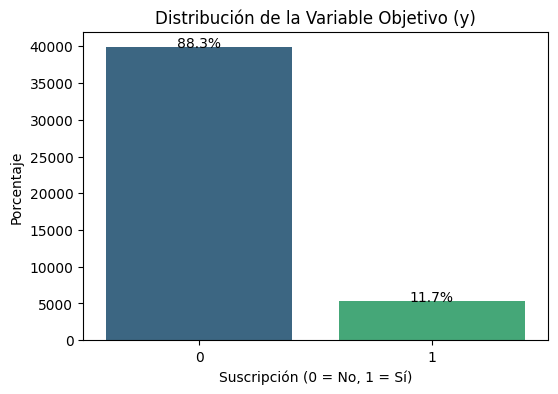

In [ ]:
# Gráfico de barras para la variable objetivo
plt.figure(figsize=(6, 4))
total = len(df)
ax = sns.countplot(x='y', data=df, palette='viridis')

# Añadir porcentajes encima de las barras
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribución de la Variable Objetivo (y)')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Porcentaje')
plt.show()

88.3% para no suscripción y 11,7% para suscripción del deposito por parte de los clientes. podemos decir que el data set esta muy desbalanceado. cuando la distribucion del conjuto de datos esta desbalanceado, esto puede llevar a un sesgo en el modelo de entrenamiento, lo que puede afectar en su rendimiento futuro.

<ipython-input-8-9b5beb7945c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='viridis')
<ipython-input-8-9b5beb7945c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='viridis')
<ipython-input-8-9b5beb7945c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='viridis')
<ipython-input-8-9b5beb7945c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

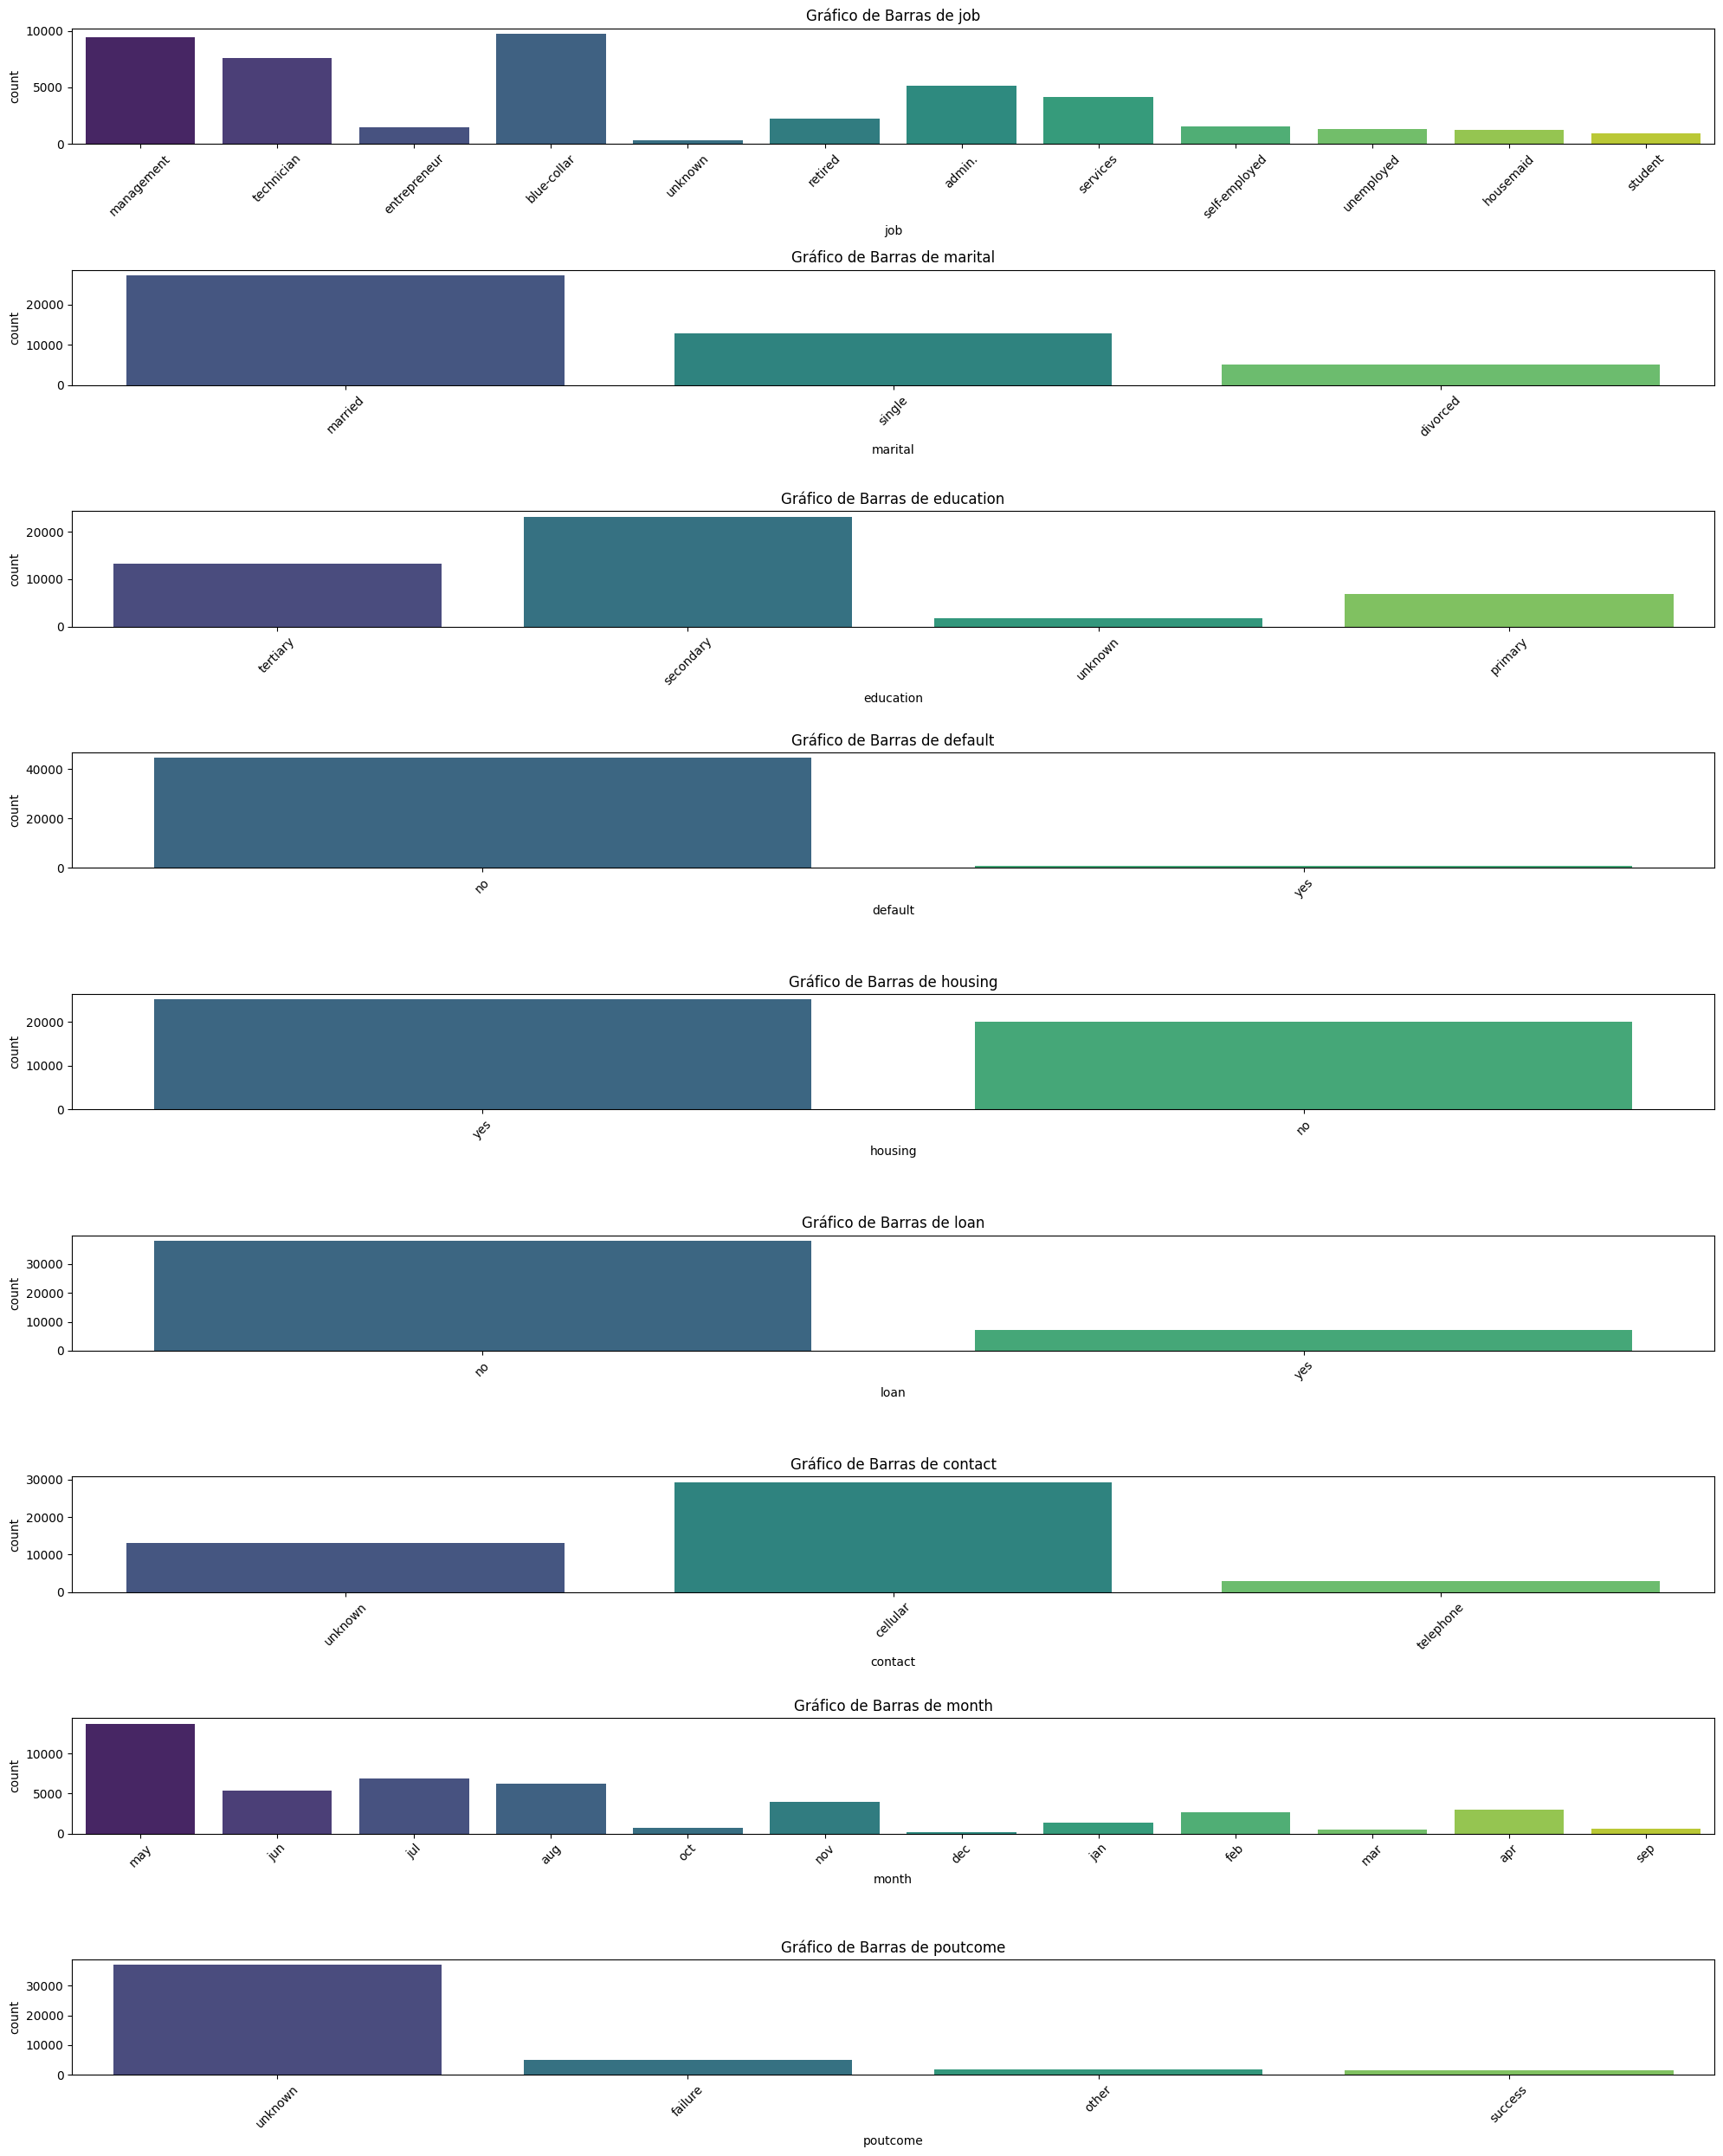

In [ ]:
# Identificar variables categóricas
cat_vars = df.select_dtypes(include=['object']).columns
# Graficar gráficos de barras para variables categóricas
plt.figure(figsize=(20, 25))
for i, var in enumerate(cat_vars):
    plt.subplot(len(cat_vars), 1, i+1)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Gráfico de Barras de {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
cat_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
df['job'].value_counts()


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [ ]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [ ]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [ ]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [ ]:
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [ ]:
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [ ]:
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [ ]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [ ]:
# Identificar variables numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

**Idenificar outliers y proceso IQR**

In [ ]:
# Función para calcular los límites de outliers
def Outdet(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    LR = Q1 - (IQR * 1.5)
    UR = Q3 + (IQR * 1.5)
    return LR, UR

# Aplicar la función para calcular los límites de outliers en variables numéricas
LR, UR = Outdet(df[num_vars])

print("El Outlier del quartil inferior es:\n", LR)
print("El Outlier del quartil superior es:\n", UR)

El Outlier del quartil inferior es:
 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
y              0.0
dtype: float64
El Outlier del quartil superior es:
 age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
y              0.0
dtype: float64


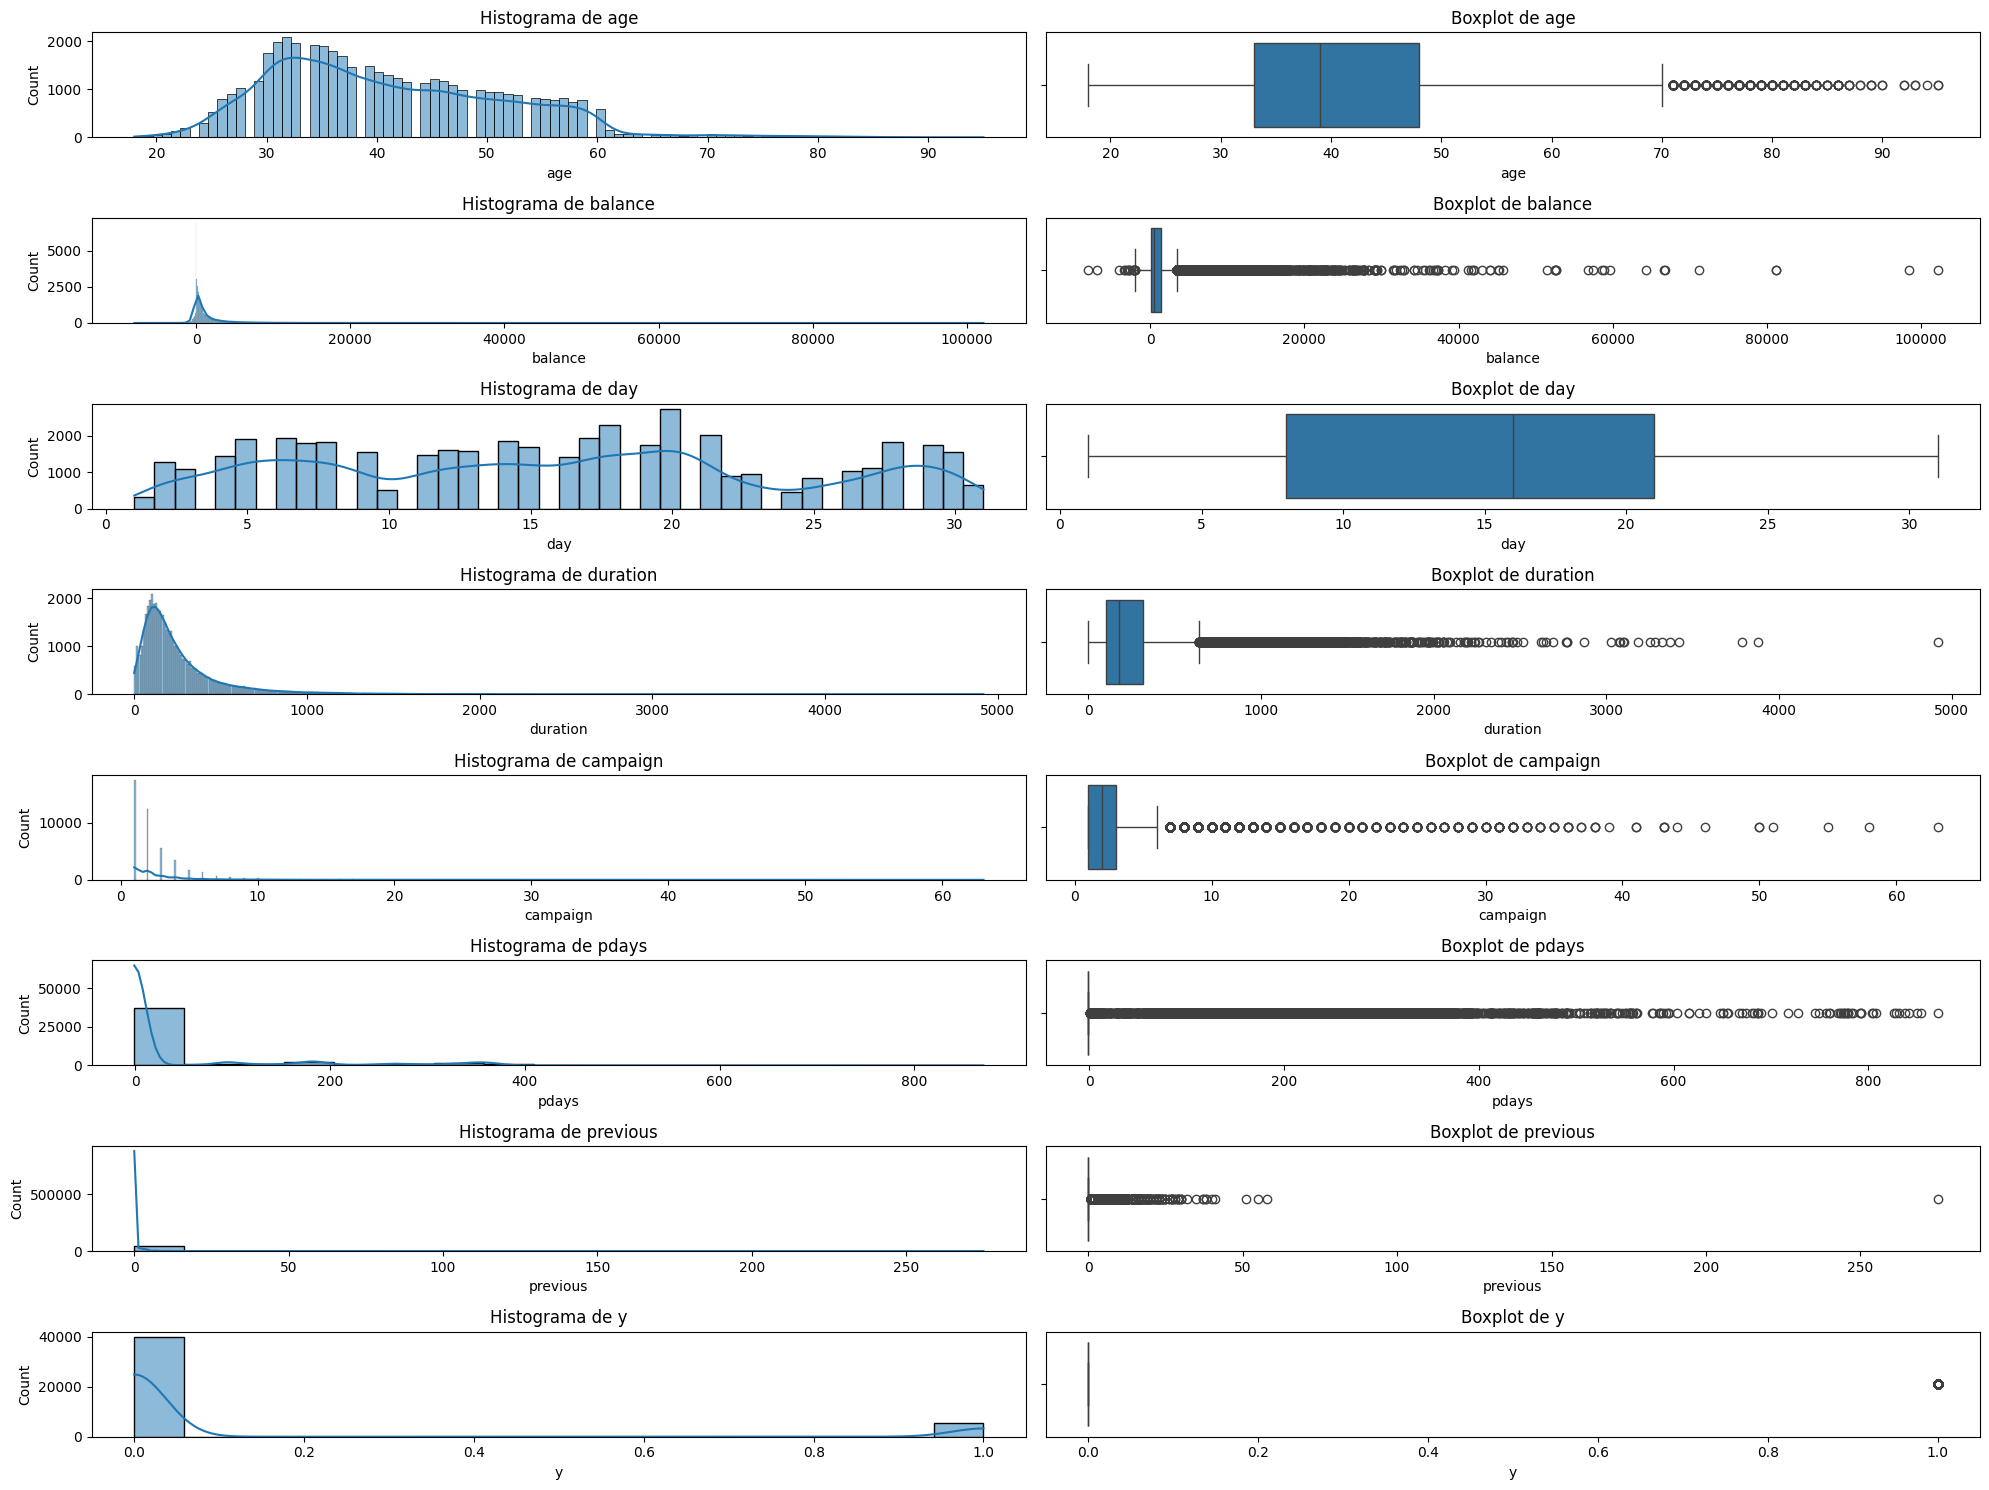

In [ ]:
# Graficar histogramas y boxplots para variables numéricas
plt.figure(figsize=(20, 15))
for i, var in enumerate(num_vars):
    plt.subplot(len(num_vars), 2, 2*i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(len(num_vars), 2, 2*i+2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.tight_layout()
plt.show()


<ipython-input-30-d1fa94b0e547>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df, palette='viridis')


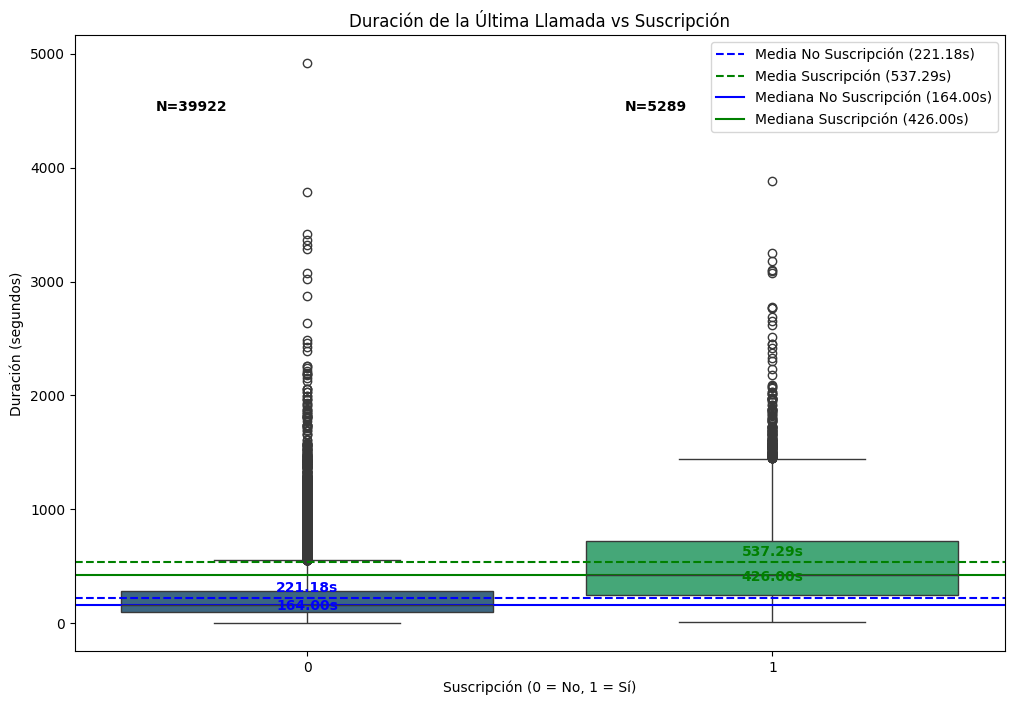

In [ ]:
#Grafico Duración ultima llamada vs suscripción
plt.figure(figsize=(12, 8))
sns.boxplot(x='y', y='duration', data=df, palette='viridis')

# Añadir medias y medianas
mean_duration_no = df[df['y'] == 0]['duration'].mean()
mean_duration_yes = df[df['y'] == 1]['duration'].mean()
median_duration_no = df[df['y'] == 0]['duration'].median()
median_duration_yes = df[df['y'] == 1]['duration'].median()

plt.axhline(mean_duration_no, color='blue', linestyle='--', label=f'Media No Suscripción ({mean_duration_no:.2f}s)')
plt.axhline(mean_duration_yes, color='green', linestyle='--', label=f'Media Suscripción ({mean_duration_yes:.2f}s)')
plt.axhline(median_duration_no, color='blue', linestyle='-', label=f'Mediana No Suscripción ({median_duration_no:.2f}s)')
plt.axhline(median_duration_yes, color='green', linestyle='-', label=f'Mediana Suscripción ({median_duration_yes:.2f}s)')

# Anotar el número de observaciones
num_no = df[df['y'] == 0].shape[0]
num_yes = df[df['y'] == 1].shape[0]

plt.text(-0.25, 4500, f'N={num_no}', horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0.75, 4500, f'N={num_yes}', horizontalalignment='center', size='medium', color='black', weight='semibold')

# Añadir anotaciones directas para medias y medianas
plt.text(0, mean_duration_no + 50, f'{mean_duration_no:.2f}s', horizontalalignment='center', color='blue', weight='semibold')
plt.text(1, mean_duration_yes + 50, f'{mean_duration_yes:.2f}s', horizontalalignment='center', color='green', weight='semibold')
plt.text(0, median_duration_no - 50, f'{median_duration_no:.2f}s', horizontalalignment='center', color='blue', weight='semibold')
plt.text(1, median_duration_yes - 50, f'{median_duration_yes:.2f}s', horizontalalignment='center', color='green', weight='semibold')

plt.title('Duración de la Última Llamada vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Duración (segundos)')
plt.legend()
plt.show()

<ipython-input-31-704a79f4b921>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df, palette='viridis')


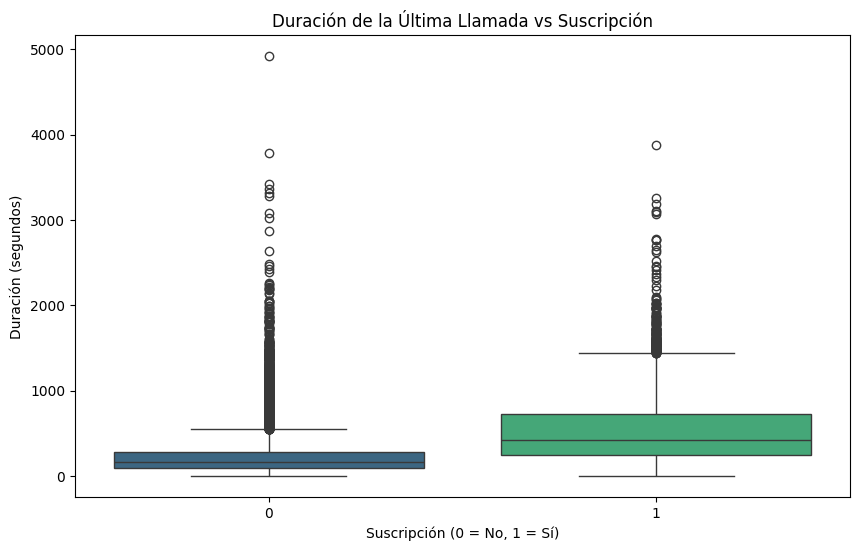

In [ ]:
#Grafico mas simple
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df, palette='viridis')
plt.title('Duración de la Última Llamada vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Duración (segundos)')
plt.show()

A simple vista identificamos que a mayor duración de una llamada, mayor probabilidad de aceptar el deposito.

<ipython-input-33-b6b0457dd915>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y='balance', data=df, palette='viridis')


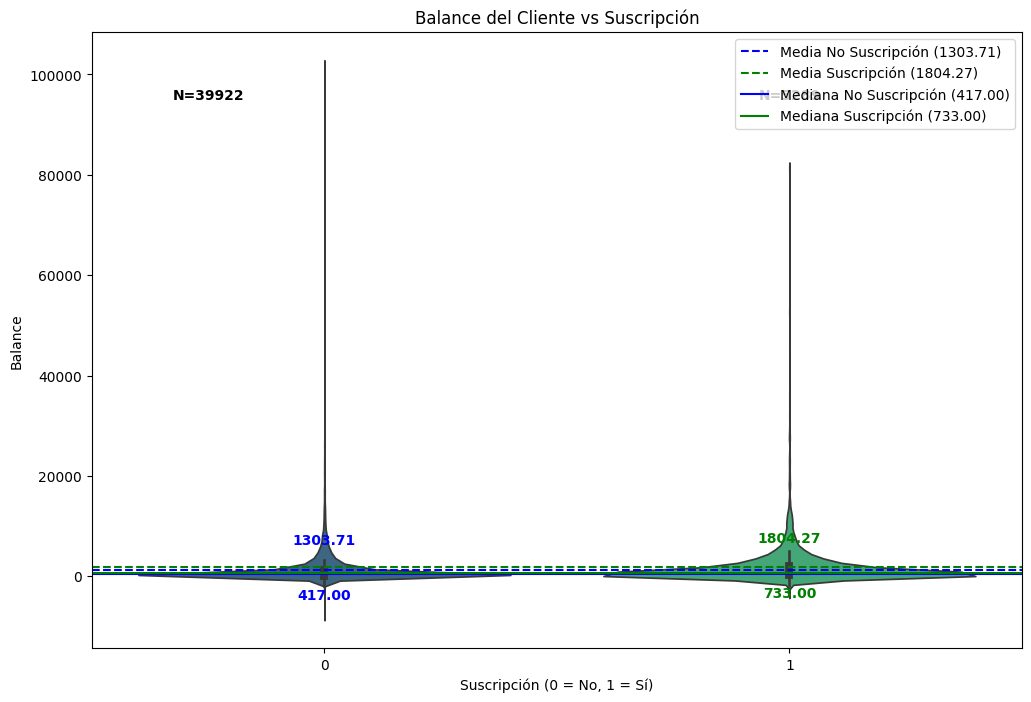

In [ ]:
# Crear el gráfico de violín mejorado
plt.figure(figsize=(12, 8))
sns.violinplot(x='y', y='balance', data=df, palette='viridis')

# Añadir medias y medianas
mean_balance_no = df[df['y'] == 0]['balance'].mean()
mean_balance_yes = df[df['y'] == 1]['balance'].mean()
median_balance_no = df[df['y'] == 0]['balance'].median()
median_balance_yes = df[df['y'] == 1]['balance'].median()

plt.axhline(mean_balance_no, color='blue', linestyle='--', label=f'Media No Suscripción ({mean_balance_no:.2f})')
plt.axhline(mean_balance_yes, color='green', linestyle='--', label=f'Media Suscripción ({mean_balance_yes:.2f})')
plt.axhline(median_balance_no, color='blue', linestyle='-', label=f'Mediana No Suscripción ({median_balance_no:.2f})')
plt.axhline(median_balance_yes, color='green', linestyle='-', label=f'Mediana Suscripción ({median_balance_yes:.2f})')

# Anotar el número de observaciones
num_no = df[df['y'] == 0].shape[0]
num_yes = df[df['y'] == 1].shape[0]

plt.text(-0.25, 95000, f'N={num_no}', horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(1, 95000, f'N={num_yes}', horizontalalignment='center', size='medium', color='black', weight='semibold')

# Añadir anotaciones directas para medias y medianas
plt.text(0, mean_balance_no + 5000, f'{mean_balance_no:.2f}', horizontalalignment='center', color='blue', weight='semibold')
plt.text(1, mean_balance_yes + 5000, f'{mean_balance_yes:.2f}', horizontalalignment='center', color='green', weight='semibold')
plt.text(0, median_balance_no - 5000, f'{median_balance_no:.2f}', horizontalalignment='center', color='blue', weight='semibold')
plt.text(1, median_balance_yes - 5000, f'{median_balance_yes:.2f}', horizontalalignment='center', color='green', weight='semibold')

plt.title('Balance del Cliente vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Balance')
plt.legend()
plt.show()

<ipython-input-35-410eb10b0c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y='balance', data=df, palette='viridis')


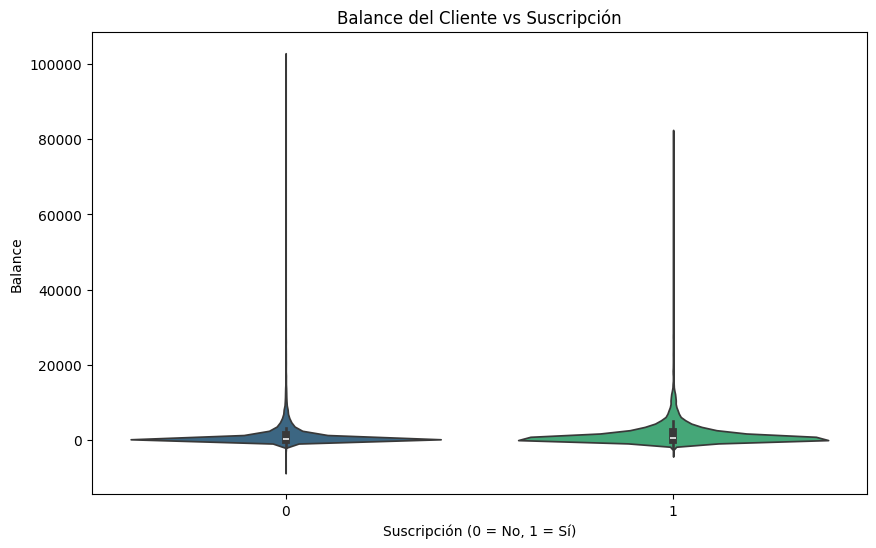

In [ ]:
# Gráfico de violín para balance del cliente vs suscripción
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='balance', data=df, palette='viridis')
plt.title('Balance del Cliente vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Balance')
plt.show()

balance de cliente vs suscripción, mantiene distribución similares, concentrandose estas en balances bajos, 0 o ceranos a 0.

In [ ]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<ipython-input-11-298812be68e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette='viridis')


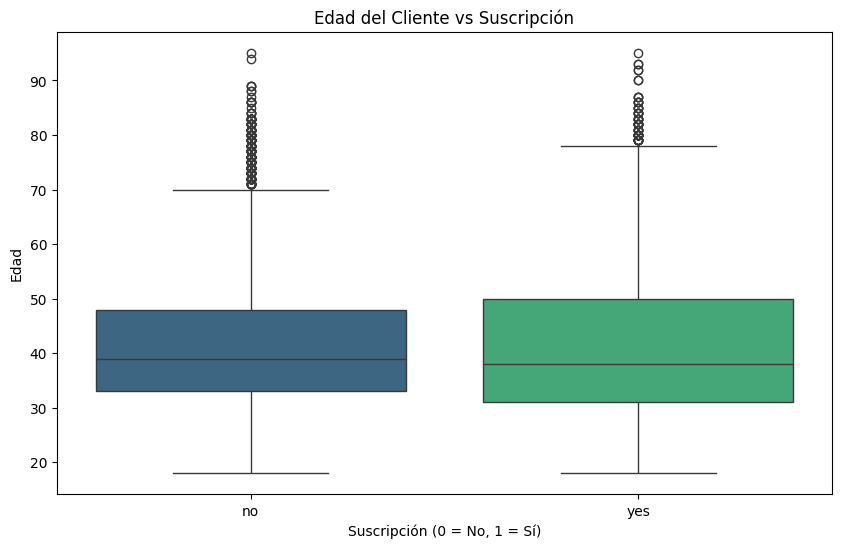

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df, palette='viridis')
plt.title('Edad del Cliente vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()

Identificamos que el promedio de edad para el grupo no suscrito y suscrito es aprox 40 años
50% se encuentra entre los 30 y 50 años


<ipython-input-83-ac625a7624a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y='campaign', data=df, palette='viridis')


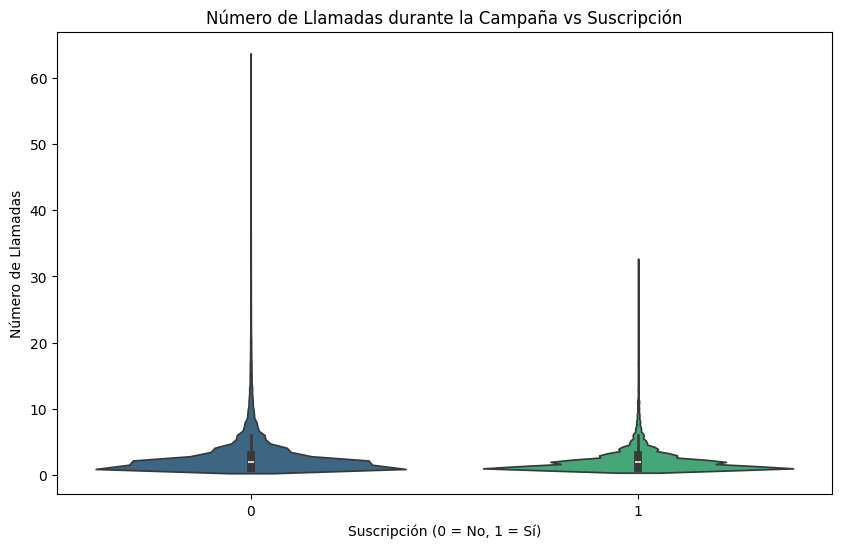

In [ ]:
# Gráfico de violín para número de llamadas vs suscripción
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='campaign', data=df, palette='viridis')
plt.title('Número de Llamadas durante la Campaña vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Número de Llamadas')
plt.show()

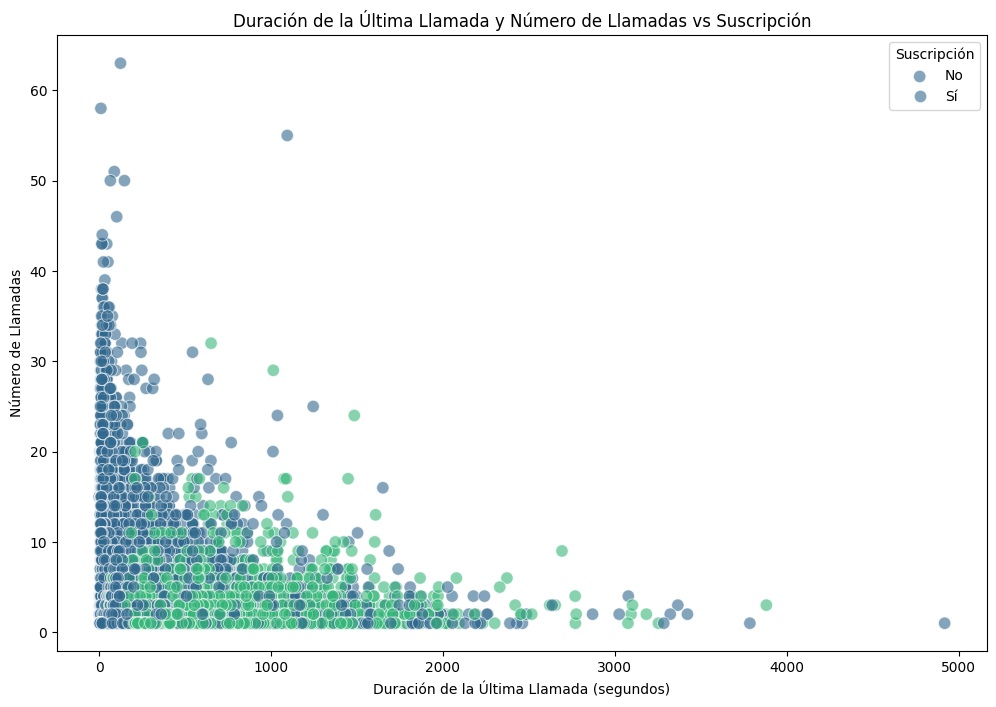

In [ ]:
# Scatter plot para duración de la última llamada y número de llamadas vs suscripción
plt.figure(figsize=(12, 8))
sns.scatterplot(x='duration', y='campaign', hue='y', data=df, palette='viridis', alpha=0.6, s=80)

# Añadir una línea de tendencia
sns.regplot(x='duration', y='campaign', data=df[df['y'] == 1], scatter=False, color='green', label='Suscrito')
sns.regplot(x='duration', y='campaign', data=df[df['y'] == 0], scatter=False, color='blue', label='No Suscrito')

plt.title('Duración de la Última Llamada y Número de Llamadas vs Suscripción')
plt.xlabel('Duración de la Última Llamada (segundos)')
plt.ylabel('Número de Llamadas')
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

Identificamos:
La mayoría de las llamadas tienen una duración inferior a 1000 segundos.
La mayoría de los clientes fueron contactados menos de 10 veces.

Existe una concentración de puntos en la esquina inferior izquierda, lo que sugiere que tanto la duración de la llamada como el número de llamadas son generalmente bajos.
Pocas observaciones tienen una duración de llamada superior a 3000 segundos.

Los puntos verdes (suscrito) y azules (no suscrito) están mezclados en la mayoría de las áreas, pero parece que hay una mayor proporción de puntos verdes a medida que la duración de la llamada aumenta, especialmente entre 1000 y 3000 segundos.
Para un alto número de llamadas (>10), la mayoría de los puntos son azules, indicando que más llamadas no necesariamente llevan a una suscripción.

In [ ]:
# Estadísticas descriptivas para duración, balance y edad, y campaña por suscripción
descriptive_stats_client = df.groupby('y')[['duration', 'balance', 'age','campaign']].describe().transpose()
descriptive_stats_client

y                           0             1
duration count   39922.000000   5289.000000
         mean      221.182806    537.294574
         std       207.383237    392.525262
         min         0.000000      8.000000
         25%        95.000000    244.000000
         50%       164.000000    426.000000
         75%       279.000000    725.000000
         max      4918.000000   3881.000000
balance  count   39922.000000   5289.000000
         mean     1303.714969   1804.267915
         std      2974.195473   3501.104777
         min     -8019.000000  -3058.000000
         25%        58.000000    210.000000
         50%       417.000000    733.000000
         75%      1345.000000   2159.000000
         max    102127.000000  81204.000000
age      count   39922.000000   5289.000000
         mean       40.838986     41.670070
         std        10.172662     13.497781
         min        18.000000     18.000000
         25%        33.000000     31.000000
         50%        39.000000     38.000000
         75%        48.000000     50.000000
         max        95.000000     95.000000
campaign count   39922.000000   5289.000000
         mean        2.846350      2.141047
         std         3.212767      1.921826
         min         1.000000      1.000000
         25%         1.000000      1.000000
         50%         2.000000      2.000000
         75%         3.000000      3.000000
         max        63.000000     32.000000

<Axes: >

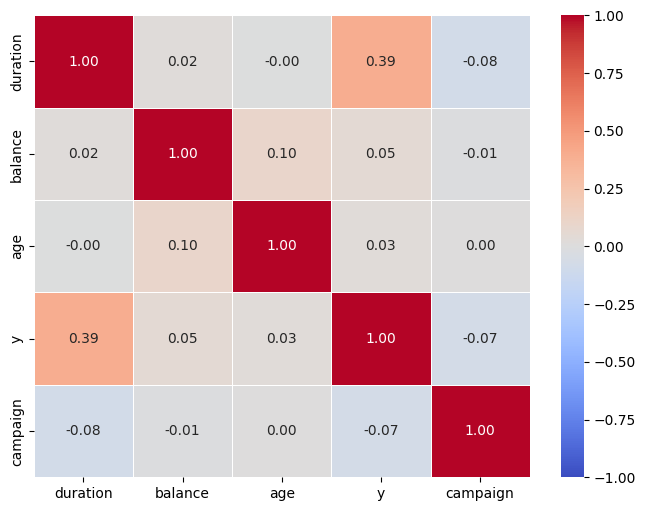

In [ ]:
# Crear el heatmap de la matriz de correlación variables interes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_client, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

identificamos gracias a este heat map, que la variable duración es la más fuerte, con 0.39, aun así está es bastante baja, por lo que significa que hay una correlación positiva moderada entre la duración de la última llamada y la suscripción a un depósito a plazo fijo. En términos más simples:

Duración (0.39): Un valor de 0.39 sugiere que a medida que la duración de la última llamada aumenta, es más probable que el cliente se suscriba a un depósito a plazo fijo. Esta correlación es moderada, lo que significa que la duración tiene un efecto notable pero no dominante sobre la decisión de suscribirse.

Otras variables  cercanas a 0 correlación.

**Ingeniería de atributos**

In [ ]:
#librerias a utilizar en el proceso
!pip install sklearn-pandas

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn_pandas import DataFrameMapper


In [ ]:
# Identificar variables numéricas y categóricas, utilizamos
cat_vars


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
#quitamos la variable objetivo de las numericas
num_vars = num_vars.drop('y')
num_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
# Utilizamos getdummies para One hot encoding de las variables cateogoricas
df_encoded = pd.get_dummies(df, columns=cat_vars, dtype = int)

# Verificar la codificación
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Función para calcular y manejar outliers usando el IQR
def manejar_outliers(df, num_vars):
    for var in num_vars:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[var] = df[var].apply(lambda x: df[var].median() if x < lower_bound or x > upper_bound else x)
    return df

identifica outliers utilizando el IQR y los reemplaza con la mediana de la columna.

In [ ]:
# Normalizar las variables numéricas
scaler = StandardScaler()
df_encoded[num_vars] = scaler.fit_transform(df_encoded[num_vars])

In [ ]:
# Verificar la normalización
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Normalizacion exitosa

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Verificar la integridad de los datos de entrenamiento y prueba
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (31647, 51)
Shape of X_test: (13564, 51)
Shape of y_train: (31647,)
Shape of y_test: (13564,)


In [ ]:
# Aplicar SMOTE para el sobremuestreo solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Ya que la clase se encontraba desbalanceada el proceso de SMOTE permite balancear esta clase, como se muestra con Counter.

In [ ]:
# Verificar la distribución después del sobremuestreo
print("Distribucion de clase antes de sobremuestreo:", Counter(y))
print("Distribución de clase después del sobremuestreo:", Counter(y_train_resampled))
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

Distribucion de clase antes de sobremuestreo: Counter({0: 39922, 1: 5289})
Distribución de clase después del sobremuestreo: Counter({0: 27945, 1: 27945})
Shape of X_train_resampled: (55890, 51)
Shape of y_train_resampled: (55890,)


**Modelos de Machine learning**
a continuacion aplicaremos los siguientes modelos ML
1. Regresion logistica
2. Random forest
3. Gradient Boosting

para luego ser comparados entre si con sus respectivas metricas, las cuales nos permitira concluir en insights valiosos para la toma de decisiones y las preguntas planteadas

REGRESION LOGISTICA, es un algoritmo de clasificacion que es usado para predecir la probabilidad de una variable dependiente categorica

In [ ]:
# Modelo de Regresión Logística con aumento de iteraciones
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba original
y_pred_lr = lr.predict(X_test)

# Verificar la integridad de las predicciones
print(f"Shape of y_pred_lr: {y_pred_lr.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Evaluar el modelo
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print("Precision:",precision_score(y_test, y_pred_lr))
print("Recall:",recall_score(y_test, y_pred_lr))
print("Regresión Logística:\n", classification_report(y_test, y_pred_lr))
print("Matriz de Confusion:\n", confusion_matrix(y_test, y_pred_lr))

Shape of y_pred_lr: (13564,)
Shape of y_test: (13564,)
Accuracy: 0.8981863757003834
Precision: 0.5682119205298013
Recall: 0.5406427221172023
Regresión Logística:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.57      0.54      0.55      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.74      0.75     13564
weighted avg       0.90      0.90      0.90     13564

Matriz de Confusion:
 [[11325   652]
 [  729   858]]


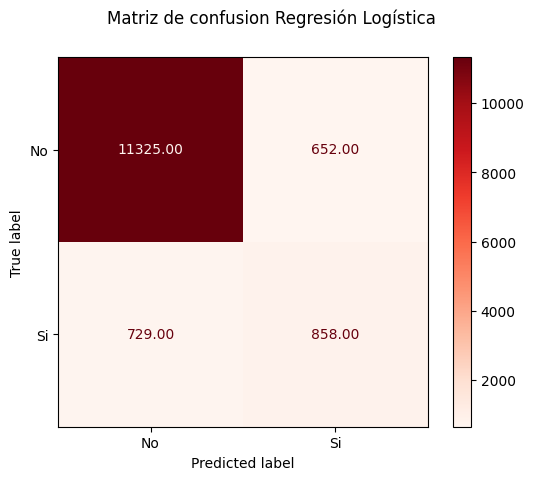

In [ ]:
#Plot de matriz de confusion
plot_lr = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr),
                                display_labels=["No", "Si"])
# Pass the cmap argument to the plot() method
plot_lr.plot(cmap=plt.cm.Reds, values_format='.2f')
plot_lr.figure_.suptitle("Matriz de confusion Regresión Logística")
plt.show()

In [ ]:
# Modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba original
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     11977
           1       0.57      0.61      0.59      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.78      0.77     13564
weighted avg       0.90      0.90      0.90     13564

[[11240   737]
 [  615   972]]


**Gradient Boosting**
 modelo de Ensamble, que combina varios modelos secuenciales, donde cada modelo intenta corregir los errores del modelo anterior

In [ ]:
# Definir el modelo Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo en los datos sobremuestreados
gb.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba original
y_pred_gb = gb.predict(X_test)

# Evaluar el modelo
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("Matriz de Confusion:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93     11977
           1       0.48      0.78      0.60      1587

    accuracy                           0.88     13564
   macro avg       0.73      0.84      0.76     13564
weighted avg       0.91      0.88      0.89     13564

Matriz de Confusion:
 [[10649  1328]
 [  345  1242]]


**Cross-Validation**



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Evaluar modelos de Machine Learning con k-Fold Cross-Validation y entrenar los modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for nombre, modelo in modelos.items():
    print(f"Evaluando {nombre}...")
    # Aplicar k-Fold Cross-Validation
    scores = cross_val_score(modelo, X_train_resampled, y_train_resampled, cv=5)
    print(f"{nombre} Cross-Validation Scores: {scores}")
    print(f"Mean Cross-Validation Score: {scores.mean()}")

    # Entrenar el modelo
    modelo.fit(X_train_resampled, y_train_resampled)

    # Predecir en el conjunto de prueba original
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
    print(f"{nombre}:\n", classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Evaluando Logistic Regression...
Logistic Regression Cross-Validation Scores: [0.76552156 0.94283414 0.94050814 0.93621399 0.93988191]
Mean Cross-Validation Score: 0.9049919484702093
Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.57      0.54      0.55      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.74      0.75     13564
weighted avg       0.90      0.90      0.90     13564

[[11325   652]
 [  729   858]]
Evaluando Random Forest...
Random Forest Cross-Validation Scores: [0.90195026 0.95831097 0.96314189 0.95848989 0.96251566]
Mean Cross-Validation Score: 0.9488817319735194
Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     11977
           1       0.57      0.61      0.59      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.7

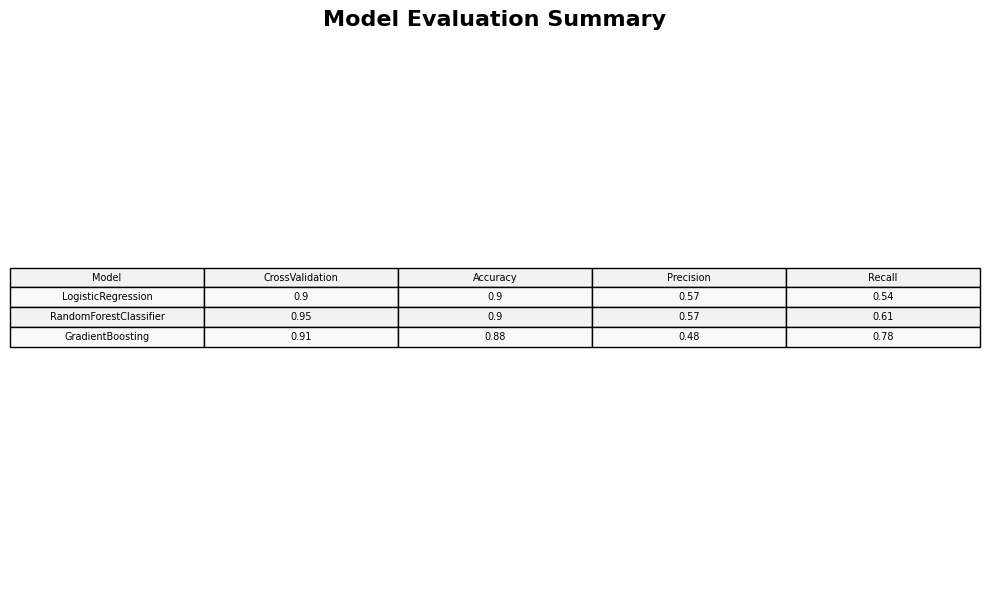

In [ ]:
# Crear el DataFrame
dfnew = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'GradientBoosting'],
    'CrossValidation': [0.90, 0.95, 0.91],
    'Accuracy': [0.90, 0.90, 0.88],
    'Precision': [0.57, 0.57, 0.48],
    'Recall': [0.54, 0.61, 0.78]
})

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Ocultar el eje superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Crear la tabla
ax.table(cellText=dfnew.values,
         colLabels=dfnew.columns,
         cellLoc='center',
         loc='center',
         colColours=["#f2f2f2"]*dfnew.shape[1],
         cellColours=[["#f9f9f9"]*dfnew.shape[1] if i%2==0 else ["#f2f2f2"]*dfnew.shape[1] for i in range(dfnew.shape[0])])

# Ajustar el título y los márgenes
ax.set_title('Model Evaluation Summary', fontsize=16, weight='bold')
ax.axis('off')

# Mostrar la tabla
plt.tight_layout()
plt.show()

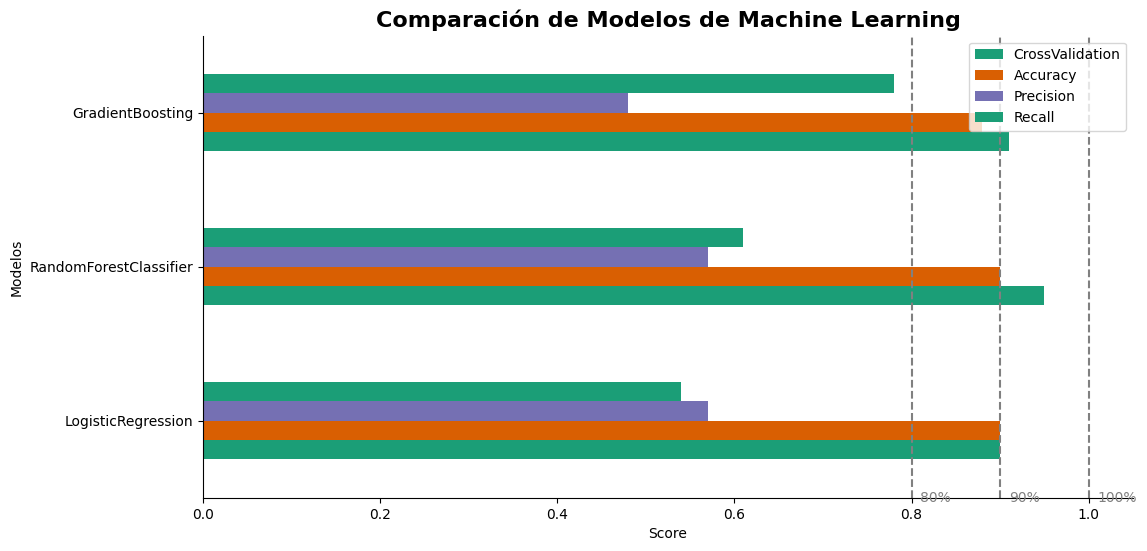

In [ ]:
# Definir colores para las barras
colors = sns.color_palette('Dark2', len(dfnew))

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras horizontales
dfnew.set_index('Model').plot(kind='barh', color=colors, ax=ax)

# Añadir líneas verticales para los percentiles 80, 90 y 100
for percentile in [0.8, 0.9, 1.0]:
    plt.axvline(x=percentile, color='grey', linestyle='--')
    plt.text(percentile + 0.01, -0.5, f'{int(percentile * 100)}%', color='grey', va='center')

# Ajustar el título y las etiquetas
ax.set_title('Comparación de Modelos de Machine Learning', fontsize=16, weight='bold')
ax.set_xlabel('Score')
ax.set_ylabel('Modelos')

# Ocultar el eje superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

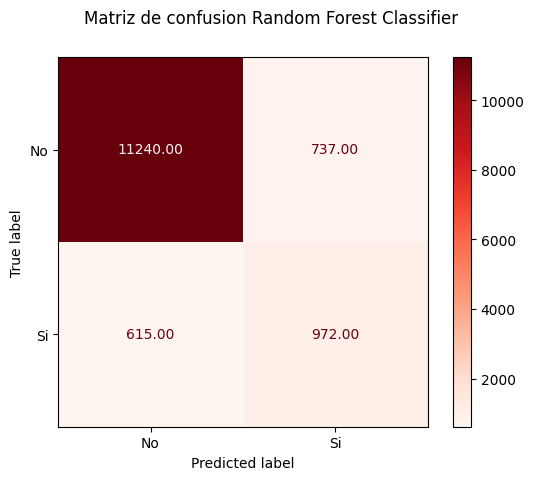

In [ ]:
#Plot de matriz de confusion
plot_RF = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf),
                                display_labels=["No", "Si"])
# Pass the cmap argument to the plot() method
plot_RF.plot(cmap=plt.cm.Reds, values_format='.2f')
plot_RF.figure_.suptitle("Matriz de confusion Random Forest Classifier")
plt.show()

**Interpretaciones:**

**Validacion Cruzada**
Random forest consigue la puntacion de validacion cruzada mas alta entre los modelos, con un 0.949, esto indica un buen rendimiento y estabilidad en los pliegues, lo sigue Gradien boosting con un 0.91, resultado consistente, y posteriormente Logistic Regresiion, obtiene un 0.905, con cierta variabilidad que puede un rendimiento menos cosistente.

**Metricas**

Accuracy
LR y RF Acurracy de 90% y GB ligramente menor con 88% , estas son buenas.

Precision, Recall y F1-Score:

Clase 0 (No suscripción): Todos los modelos tienen buenos resultados en precisión y recall para la clase mayoritaria.

Clase 1 (Suscripción): Aquí es donde se observan diferencias significativas:

Logistic Regression: Precision (1) = 0.57, Recall (1) = 0.54, F1-Score (1) = 0.55

Random Forest: Precision (1) = 0.57, Recall (1) = 0.61, F1-Score (1) = 0.59

Gradient Boosting: Precision (1) = 0.48, Recall (1) = 0.78, F1-Score (1) = 0.60

**Random Forest** parece ser el modelo más equilibrado y robusto, con la mejor media de validación cruzada y un buen balance entre precisión y recall en la clase minoritaria (1)

**Gradient Boosting** es una buena opción si se prioriza el recall para la clase minoritaria, aunque tiene menor precisión en esa clase.

**Matriz de Confusion RANDOM FOREST**

Clase 0 (No suscripción):

True Negatives (TN): 11240 clientes que no suscribieron el depósito y fueron clasificados correctamente como "No".
False Positives (FP): 737 clientes que no suscribieron el depósito pero fueron clasificados incorrectamente como "Sí".
Clase 1 (Suscripción):

False Negatives (FN): 615 clientes que suscribieron el depósito pero fueron clasificados incorrectamente como "No".
True Positives (TP): 972 clientes que suscribieron el depósito y fueron clasificados correctamente como "Sí".

**Métricas RF:**

Precision (1): 0.57
Proporción de verdaderos positivos entre todos los positivos predichos. Indica la precisión del modelo en la clase de suscripción.

Recall (1): 0.61
Proporción de verdaderos positivos entre todos los casos reales positivos. Indica la capacidad del modelo para encontrar todos los casos de suscripción.

F1-Score (1): 0.59
Promedio armónico de precisión y recall, proporcionando un equilibrio entre ambos.


Utilizarmos RF y GB para las preguntas de investigacion

Pregunta 1: **¿Qué características de los clientes están más correlacionadas con la suscripción de un depósito a plazo?**

In [ ]:
# Importancia de las características para Random Forest
feature_importances_rf = rf.feature_importances_
sorted_indices_rf = feature_importances_rf.argsort()[::-1]
print("3 Caracteristicas mas importantes para Random Forest:")
for idx in sorted_indices_rf[:3]: # Mostrar las 3 características más importantes
    print(f"{X.columns[idx]}: {feature_importances_rf[idx]}")



3 Caracteristicas mas importantes para Random Forest:
duration: 0.3245800371698854
campaign: 0.07483154396373443
balance: 0.06639108232567381


In [ ]:
# Importancia de las características para Gradient Boosting
feature_importances_gb = gb.feature_importances_
sorted_indices_gb = feature_importances_gb.argsort()[::-1]
print("3 Caracteristicas mas importantes para Gradient Boosting:")
for idx in sorted_indices_gb[:3]: # Mostrar las 3 características más importantes
    print(f"{X.columns[idx]}: {feature_importances_gb[idx]}")

3 Caracteristicas mas importantes para Gradient Boosting:
duration: 0.470558770695927
campaign: 0.11591921626949056
contact_unknown: 0.08228827494616646


Pregunta 2: **¿Cómo afectan las diferentes estrategias de contacto (número de llamadas, tiempo de contacto) a la probabilidad de éxito de las campañas de marketing?**

<ipython-input-40-929fc3d6bcba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices][:10], y=X.columns[sorted_indices][:10], palette="viridis")


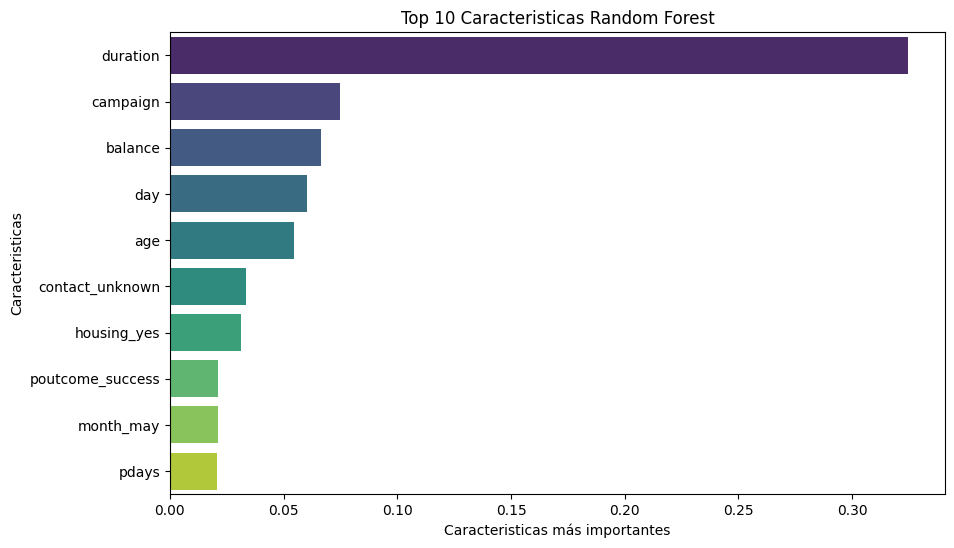

<ipython-input-40-929fc3d6bcba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices][:10], y=X.columns[sorted_indices][:10], palette="viridis")


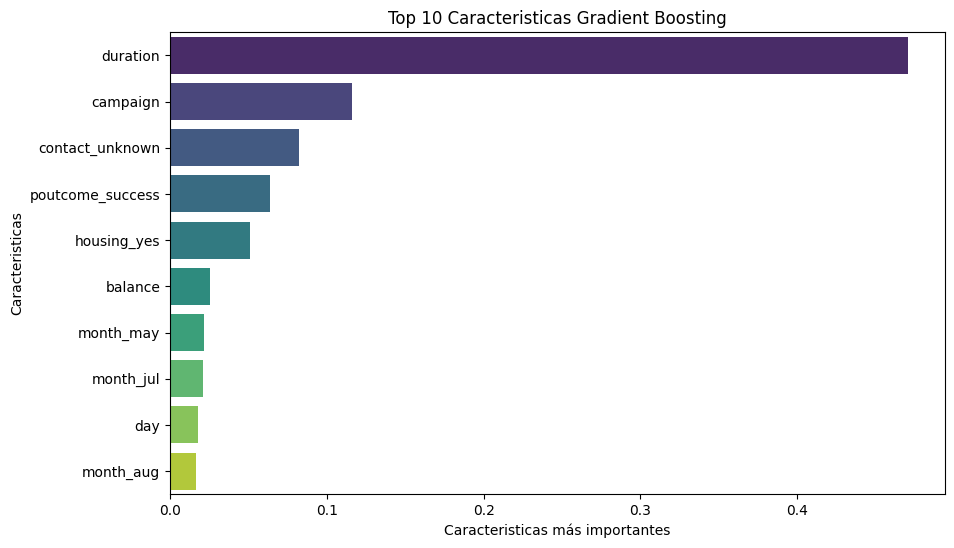

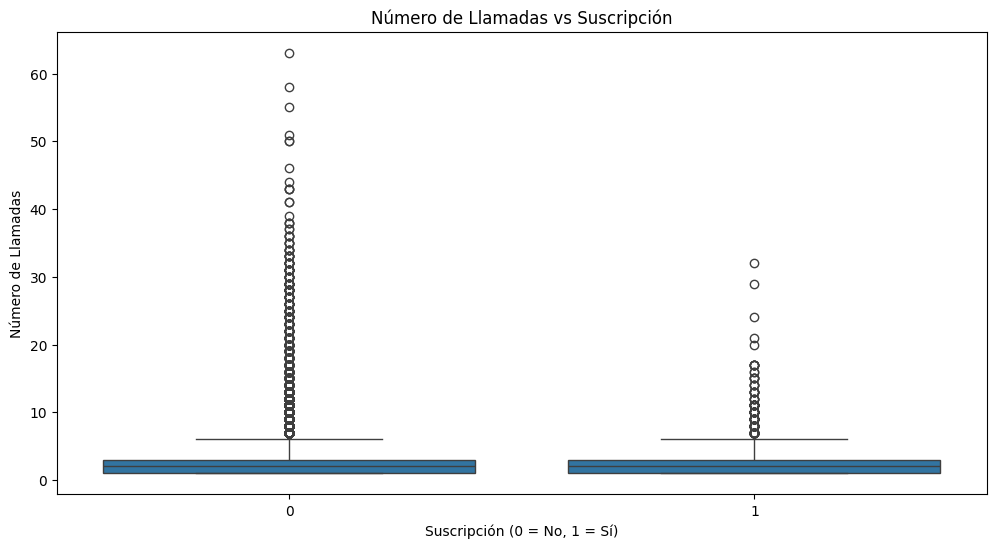

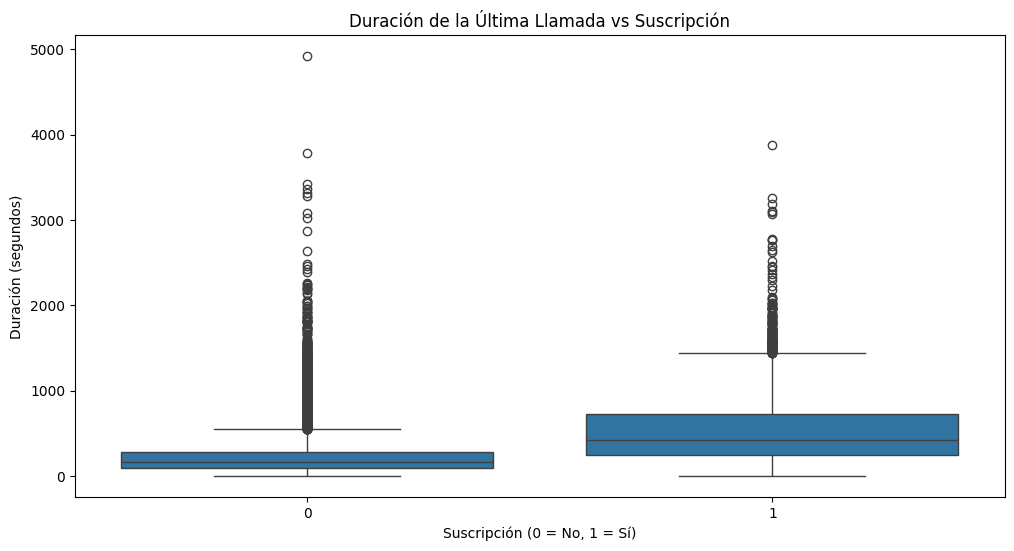

In [ ]:
# Visualizar la importancia de las características
def plot_feature_importances(model, X, title):
    feature_importances = model.feature_importances_
    sorted_indices = feature_importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.barplot(x=feature_importances[sorted_indices][:10], y=X.columns[sorted_indices][:10], palette="viridis")
    plt.xlabel("Caracteristicas más importantes")
    plt.ylabel("Caracteristicas")
    plt.show()

# Plot feature importances for Random Forest and Gradient Boosting
plot_feature_importances(rf, X, "Top 10 Caracteristicas Random Forest")
plot_feature_importances(gb, X, "Top 10 Caracteristicas Gradient Boosting")

# Análisis detallado de las características de interés
variables_interes = ['campaign', 'duration']

# Relación entre el número de llamadas y la suscripción
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Número de Llamadas vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Número de Llamadas')
plt.show()

# Relación entre la duración de la última llamada y la suscripción
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duración de la Última Llamada vs Suscripción')
plt.xlabel('Suscripción (0 = No, 1 = Sí)')
plt.ylabel('Duración (segundos)')
plt.show()

Boxplots
Número de Llamadas vs Suscripción

La mayoría de los clientes tienen menos de 5 llamadas, tanto para los que suscriben como para los que no.
Hay algunos valores atípicos con un número muy alto de llamadas, pero estos son raros.

Duración de la Última Llamada vs Suscripción

Los clientes que suscriben tienden a tener una duración de llamada más larga.
La mediana de la duración de la llamada es significativamente mayor para los clientes que suscriben.

Duración de la llamada:

Es la característica más importante según ambos modelos (Random Forest y Gradient Boosting).
Los clientes que suscriben tienden a tener llamadas más largas, lo que sugiere que dedicar más tiempo a cada llamada puede aumentar la probabilidad de suscripción.

Número de llamadas (Campaign):

Es también una característica importante, aunque no tanto como la duración de la llamada.
La mayoría de los clientes reciben menos de 5 llamadas. Un mayor número de llamadas puede aumentar la probabilidad de suscripción, pero este efecto es menos pronunciado que la duración de la llamada.

Recomendaciones para Campañas Futuras

Focalizar en la Duración de la Llamada:

Entrenar a los operadores para mantener a los clientes en la llamada por más tiempo puede ser una estrategia efectiva para aumentar las tasas de suscripción.
Ofrecer scripts y técnicas para mantener el interés del cliente durante la llamada.

Optimización del Número de Llamadas:

Mantener un seguimiento del número de llamadas realizadas a cada cliente.
Evitar el exceso de llamadas que pueden resultar molestas, pero asegurarse de hacer suficientes seguimientos para maximizar las oportunidades de suscripción.

Segmentación de Clientes:

Utilizar la información de balance y otros datos financieros para segmentar a los clientes y dirigir esfuerzos específicos a aquellos con mayor probabilidad de suscripción.

Implementar modelos predictivos para identificar y priorizar a los clientes más prometedores.

**Conclusión Final**

La duración de la llamada y el número de llamadas son factores críticos para el éxito de las campañas de marketing. Focalizar en estos aspectos y optimizar las estrategias de contacto pueden resultar en un aumento significativo en las tasas de suscripción. Utilizar modelos predictivos para identificar características clave y guiar las estrategias de marketing puede proporcionar ventajas competitivas significativas para la institución bancaria.

Este análisis y las recomendaciones derivadas pueden ser utilizadas para mejorar la efectividad de las campañas de marketing directo y maximizar la probabilidad de suscripción de los clientes.